# k-nn 회귀의 문제점

* 근사한 데이터 타겟값으로 예측값을 반환하기 때문에 정확한 예측이 이뤄지지 않는 경우가 있다.
* 즉, 훈련 세트 범위를 넘어가는 샘플의 값을 예측할 수 없다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [1]:
from sklearn.model_selection import train_test_split

In [73]:
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                     perch_weight,
                                                                     random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [75]:
knr.predict([[50]]) # length = 50인 농어의 weight 예측값

array([1033.33333333])

In [76]:
distances, indexes = knr.kneighbors([[50]])
print(knr.kneighbors([[50]])) # 회귀 예측값 계산에 사용된 근사한 이웃값
print(indexes)

(array([[6., 7., 7.]]), array([[34,  8, 14]], dtype=int64))
[[34  8 14]]


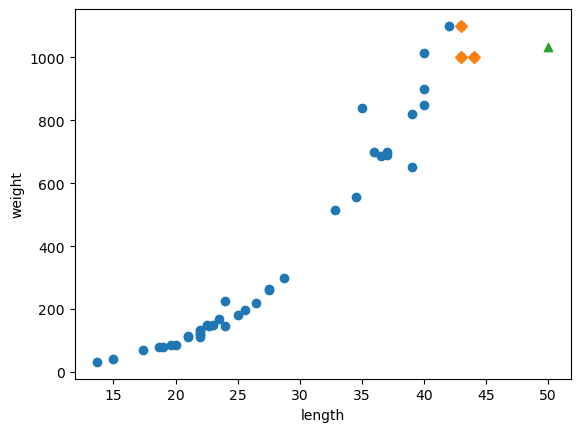

In [77]:
plt.scatter(train_input,train_target)

# 이웃 샘플
plt.scatter(train_input[indexes], train_target[indexes], marker ="D")

# 50cm 농어 데이터
plt.scatter(50,1033, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [78]:
print("이웃값의 평균: ",np.mean(train_target[indexes]))
print("모델의 예측값: ", knr.predict([[50]]))

이웃값의 평균:  1033.3333333333333
모델의 예측값:  [1033.33333333]


# 선형 회귀


훈련 세트에 맞는 직선의 방정식을 찾는 방법으로 최적의 기울기(coef_)와 절편(intercept_)를 구해야 함.

In [40]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()
lr.fit(train_input, train_target)

print("선형회귀모델의 50cm 농어의 무게 예측값: ", lr.predict([[50]]))


# 모델 파라미터:머신러닝 훈련과정 = 최적의 모데 ㄹ파라미터를 찾는 것
print("기울기(가중치):" ,lr.coef_)
print("절편: ", lr.intercept_)

선형회귀모델의 50cm 농어의 무게 예측값:  [1241.83860323]
기울기(가중치): [39.01714496]
절편:  -709.0186449535477


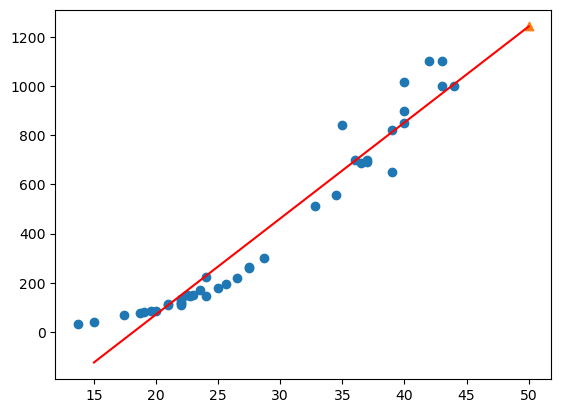

In [83]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15 *lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color='r')

plt.scatter(50,1241.8, marker="^")
plt.show()

In [84]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


# 다항 회귀
 
 
target 값에 해당하는 weight는 음수가 될 수 없기 때문에 길이를 제곱한 값을 훈련세트에 추가하여 선형 회귀 모델을 다시 훈련

In [87]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [89]:
lr = LinearRegression()

lr.fit(train_poly, train_target)


# 50cm 농어의 무게 예측
lr.predict([[50**2,50]])

array([1573.98423528])

In [93]:
# 모델 파라미터
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


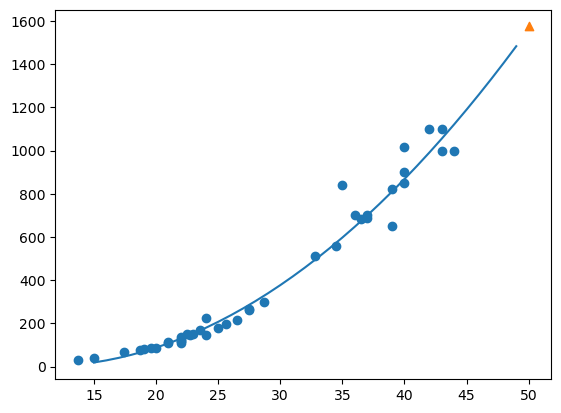

In [91]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point, 1.01*point**2-21.6*point + 116.05)

plt.scatter([50],[1574],marker="^")
plt.show()

In [90]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
